# Machine Learning Data

This section focus on the machine learning part of the project and it contains the answers for question 3-7

The dataset being used is the following:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

It contains the data of 303 patients, and the target variable is to determine wether the patient lived or died. This is useful to determine what conditions can be lethal.

## Data Exploration

In [ ]:
#Changes the working directory to where the dataset is located
path = '/content/drive/My Drive/Python/Kaggle'
os.chdir(path)

In [ ]:
#Reads the csv file
data = pd.read_csv('heart.csv')

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


General overview of the attributes.

1) age

2) sex - (1 = male; 0 = female)

3) cp - chest pain type (4 values)

4) trestbps - resting blood pressure

5) chol - serum cholestoral in mg/dl

6) fbs - fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

7) restecg - resting electrocardiographic results (values 0,1,2)

8) thalach - maximum heart rate achieved

9) exang - exercise induced angina (1 = yes; 0 = no)

10) oldpeak - ST depression induced by exercise relative to rest

11) slope - the slope of the peak exercise ST segment

12) ca - number of major vessels (0-3) colored by flourosopy

13) thal - 0 = normal; 1 = fixed defect; 2 = reversable defect.

14) target - (1 = died; 0 = lived)

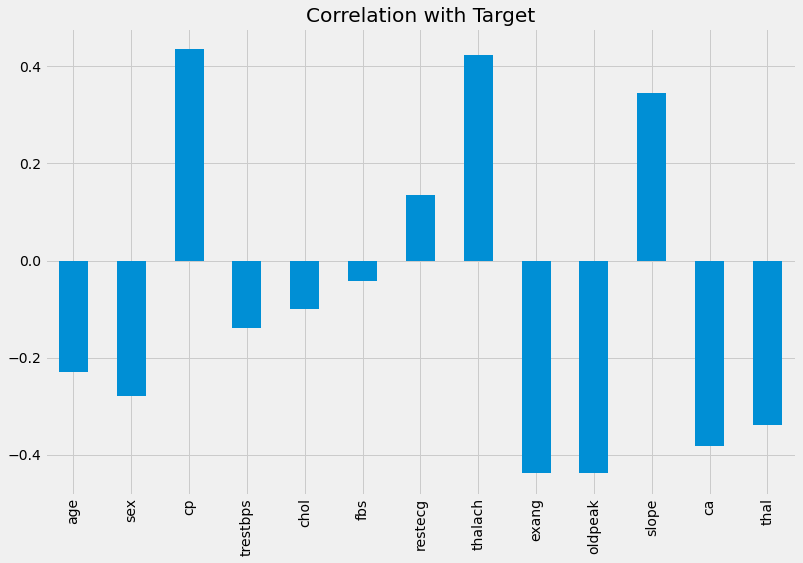

In [ ]:
data.drop('target', axis=1).corrwith(data.target).plot(kind = 'bar', grid = True, 
                                                        figsize = (12, 8), 
                                                        title = "Correlation with Target")
plt.show()

Chest pain has the highest correlation with pacients that died.

Exercise has the highest correlation with patients that survived.

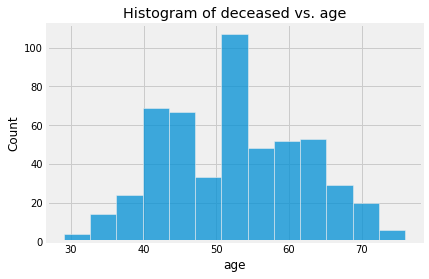

In [ ]:
deceased = data.age.where(data.target == 1)

sns.histplot(deceased)
plt.title('Histogram of deceased vs. age')

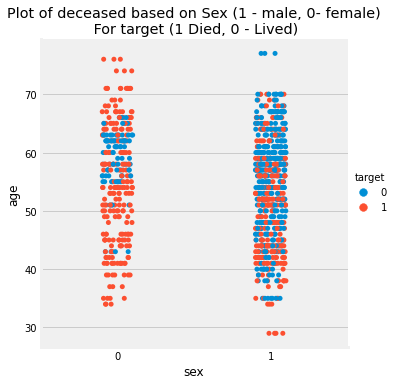

In [ ]:
sns.catplot(x='sex',y='age',hue='target',data=data)
plt.title("Plot of deceased based on Sex (1 - male, 0- female)\n For target (1 Died, 0 - Lived)")
plt.show()

## Split Data between train and test

In [ ]:
#Sets the target to be whether the patient lived or died
#Uses the other 13 attributes to make the prediction
x = data.drop(columns=['target'])
y = data.target

In [ ]:
#Scales data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=100)

## Logistic Regression

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
y_pred = log_reg.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86       119
           1       0.85      0.93      0.89       138

    accuracy                           0.88       257
   macro avg       0.88      0.87      0.88       257
weighted avg       0.88      0.88      0.88       257



In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 97,  22],
       [  9, 129]])

226 right predictions (97(true positive) and 129(true negative))

22(false positive)

9(false negative)


In [ ]:
#Shows the area under the curve score
auc = roc_auc_score(y_test,y_pred)
auc

0.8749543295579102

An AOC score tells how good the model is in classifying between different classes. The greater the score, the better the model (with a score of 1 being the maximum)

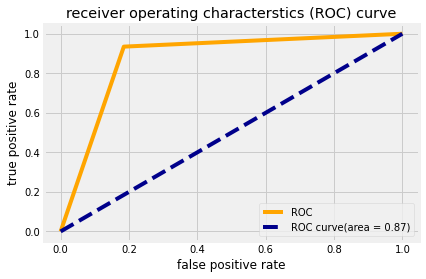

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

The final accuracy of the logistic regression is 88%

## PCA 

Using Principal Component Analysis, determine which attributes are important
for the analysis. (Do one analysis of SelectKBest features for important
attributes and another using PCA for important components)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=5), GaussianNB())
unscaled_clf.fit(x_train, y_train)
pred_test = unscaled_clf.predict(x_test)

In [ ]:
print('\nPrediction accuracy for the test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the test dataset with PCA
84.44%



In [ ]:
std_clf = make_pipeline(StandardScaler(),
                        PCA(n_components=5), GaussianNB())

std_clf.fit(x_train, y_train)

pred_test_std = std_clf.predict(x_test)

In [ ]:
print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the standardized test dataset with PCA
85.21%



By trial and error, I found n_components = 5 produced the best accuracy results.

In [ ]:
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

In [ ]:
# Use PCA without and with scale on X_train data for visualization.

x_train_transformed = pca.transform(x_train)
scaler = std_clf.named_steps['standardscaler']
x_train_std_transformed = pca_std.transform(scaler.transform(x_train))

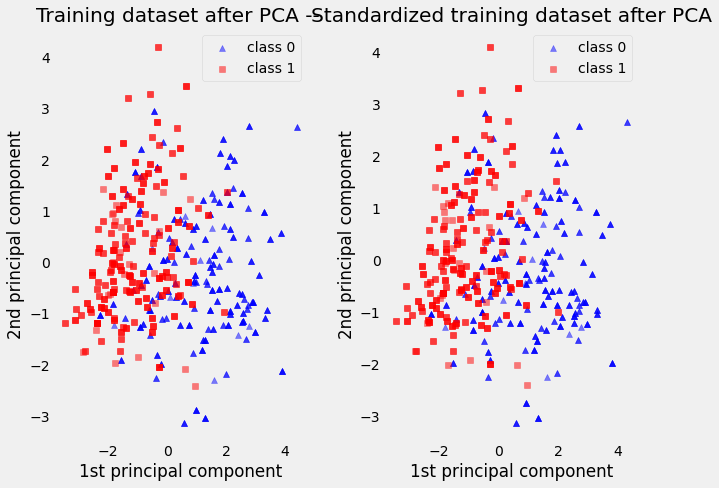

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))


for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax1.scatter(x_train_transformed[y_train == l, 0],
                x_train_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
    ax2.scatter(x_train_std_transformed[y_train == l, 0],
                x_train_std_transformed[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA -- ')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
    
plt.tight_layout()

There is no significant difference between the normal Training set and the Standardized set.


## Decision Tree

Perform classification analysis using Naïve Bayes, Decision trees, and Support
Vector machine algorithms. Provide the appropriate plots and interpretations.

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

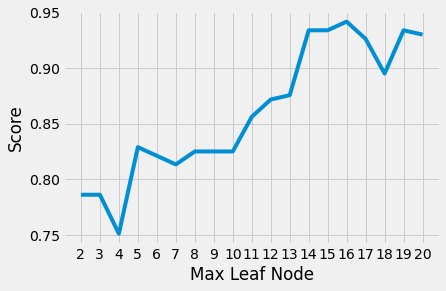

Maximum Max Leaf Node Score is 94.16%
Max Leaf Node with highest score:  15


In [ ]:
#to determine optimum number of maximum leaf nodes 
scoreList = []
for i in range(2,21):
    dt2 = DecisionTreeClassifier(max_leaf_nodes = i)  # n_neighbors means k
    dt2.fit(x_train, y_train)
    scoreList.append(dt2.score(x_test, y_test))
    
plt.plot(range(2,21), scoreList)
plt.xticks(np.arange(2,21,1))
plt.xlabel("Max Leaf Node")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum Max Leaf Node Score is {:.2f}%".format(acc))
print("Max Leaf Node with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

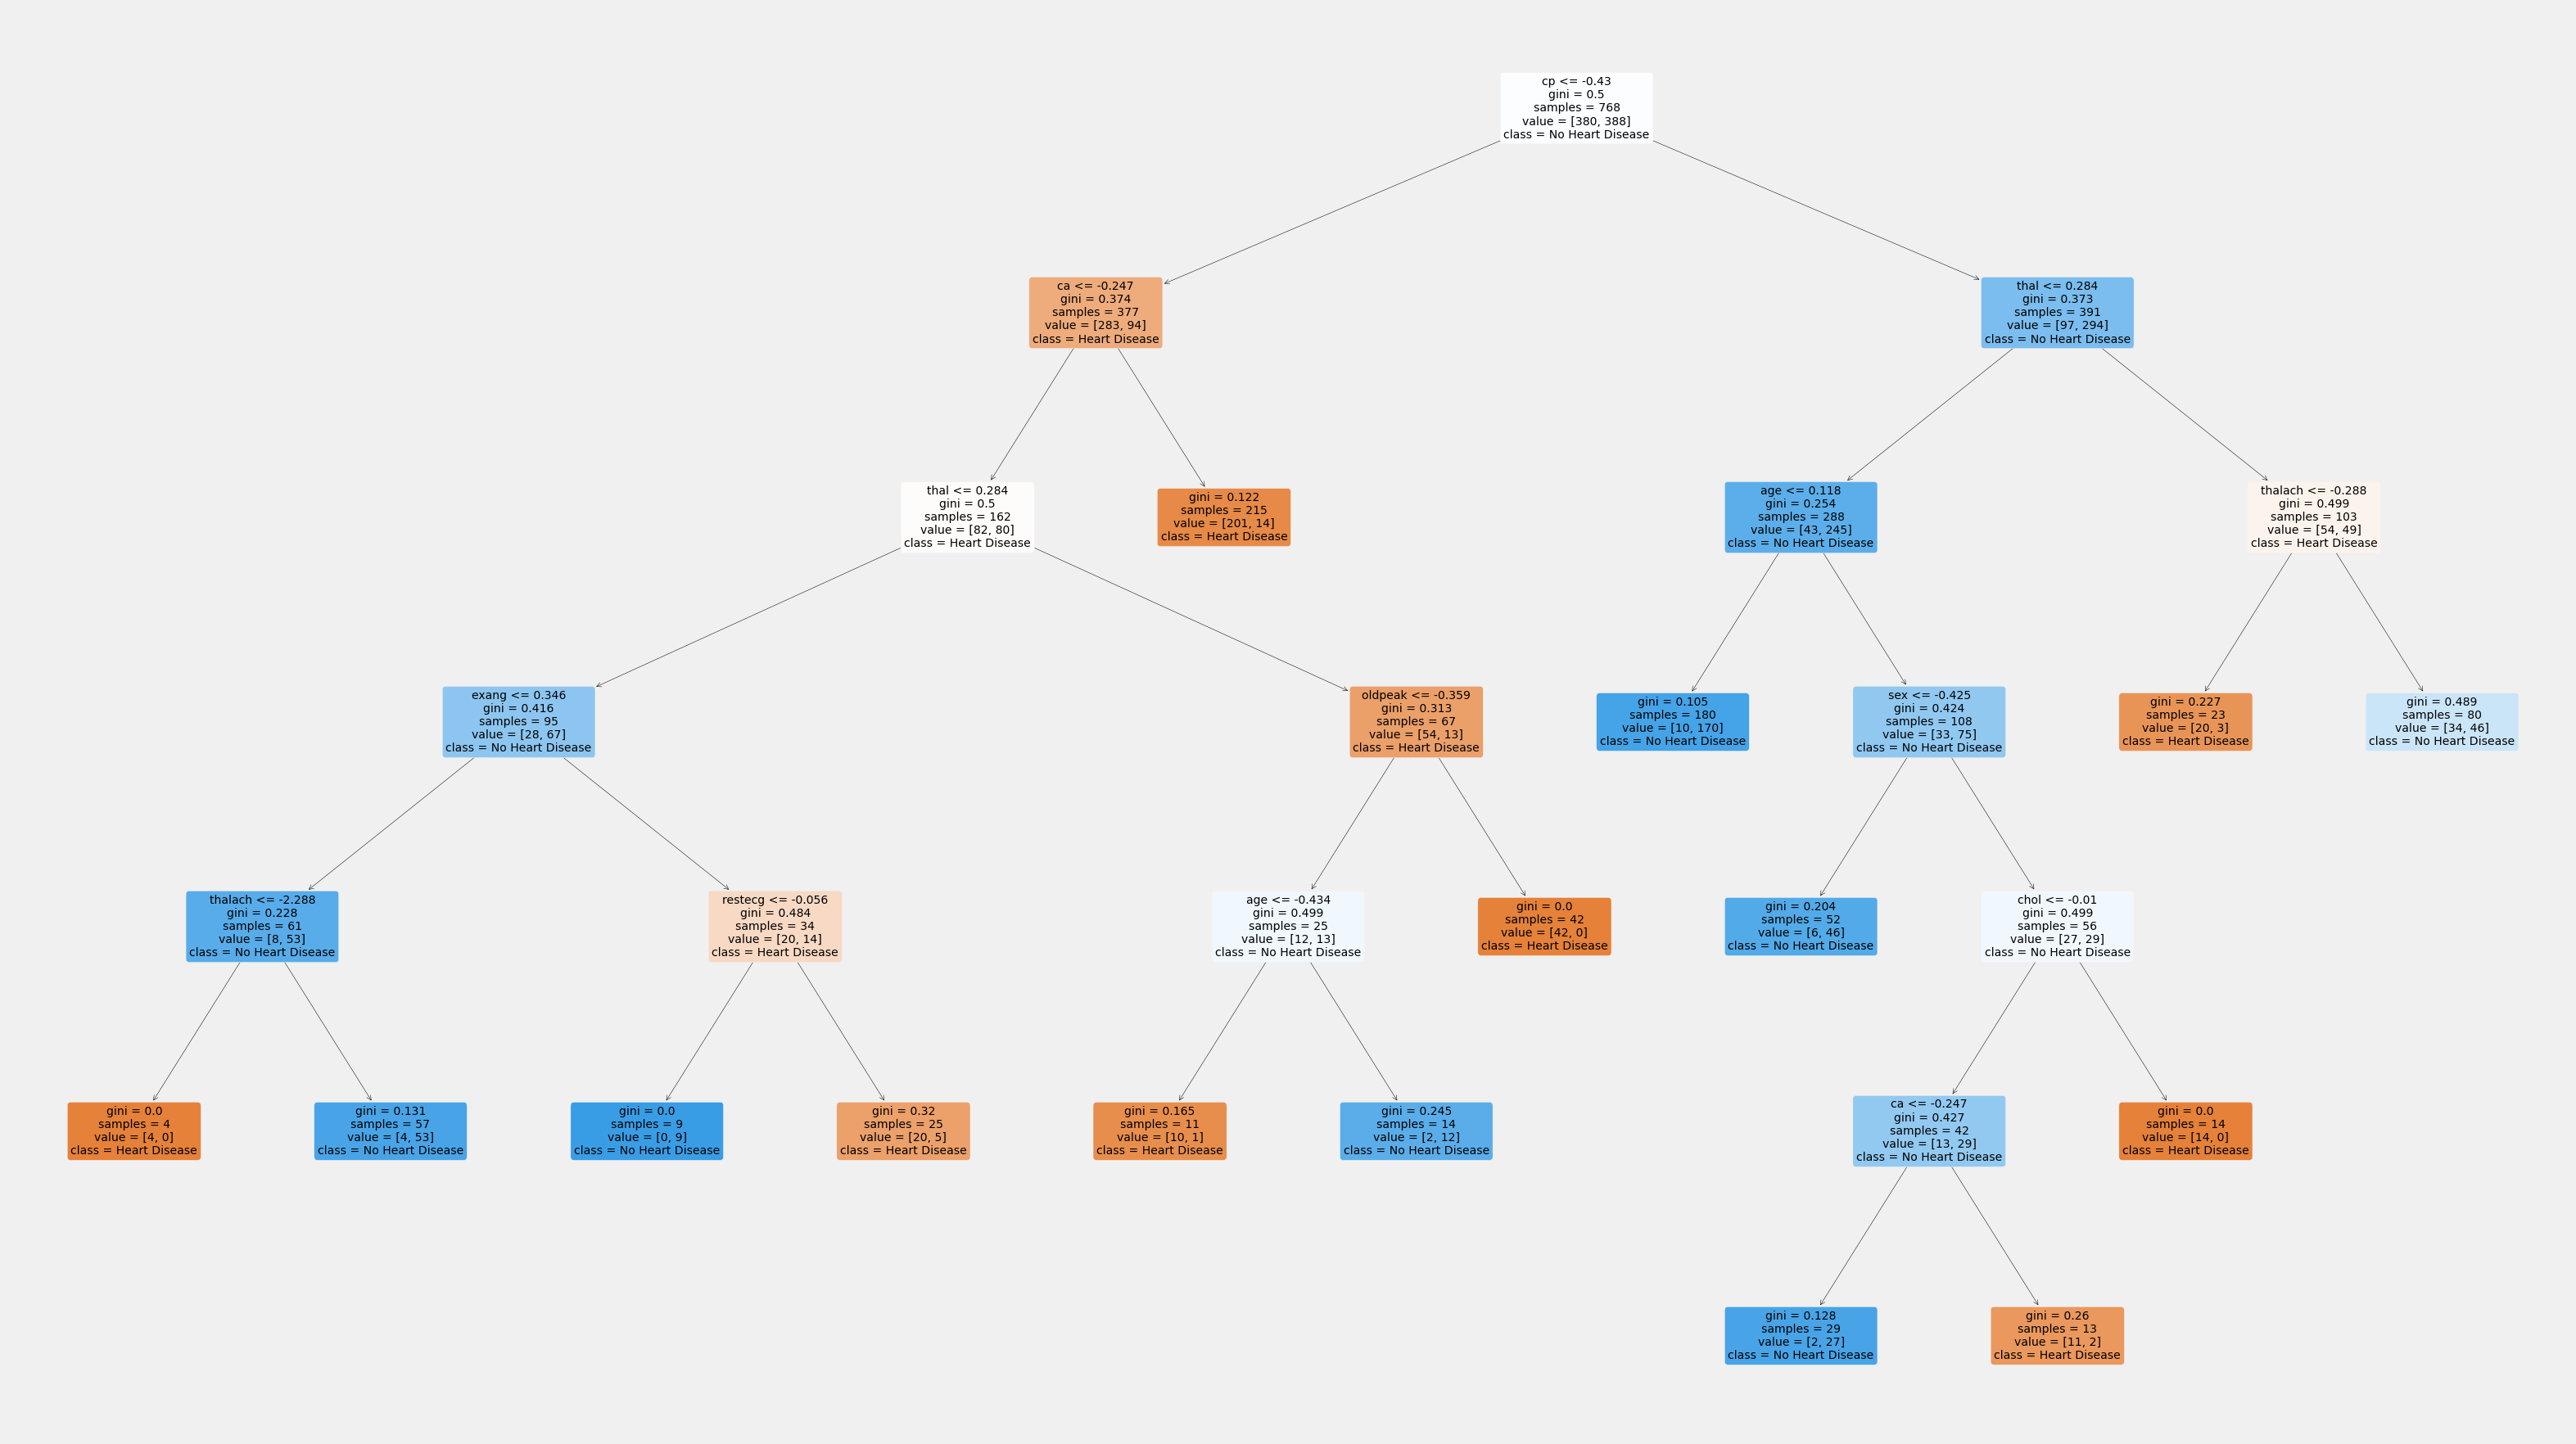

In [ ]:
DT = DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
DT = DT.fit(x_train,y_train)
plt.figure(figsize=(50,30))
a = plot_tree(DT, 
              feature_names=list(data.drop(["target"], axis=1)), 
              class_names=["Heart Disease","No Heart Disease"], 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [ ]:
dt_pred = DT.predict(x_test)
print("Accuracy of Decision Tree: ", accuracy_score(y_test, dt_pred))

Accuracy of Decision Tree:  0.933852140077821


Decision Tree Algorithm Obtained 93% Accuracy

## Clustering

Do the clustering techniques on the dataset. Provide the appropriate plots and
interpretations. Note: Use any two clustering methods.


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0)

In [ ]:
kmeans.fit(x_train)

KMeans(n_clusters=5, random_state=0)

In [ ]:
scaler = MinMaxScaler()
feature = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex_0', 'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0', 'restecg_1', 'restecg_2', 'exang_0', 'exang_1',
       'slope_0', 'slope_1', 'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3'],


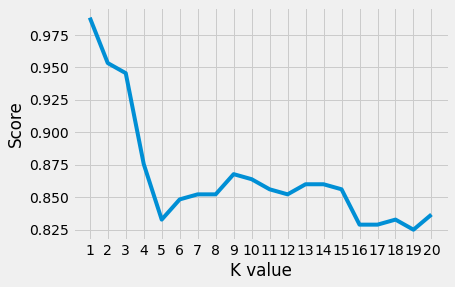

Maximum KNN Score is 98.83%
K Value with highest score:  1


In [ ]:
#to determine optimum number of neighbours
scoreList = []
for i in range(1,21):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train, y_train)
    scoreList.append(knn2.score(x_test, y_test))
    
plt.plot(range(1,21), scoreList)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))
print("K Value with highest score: ", (scoreList.index(max(scoreList))+1)) #+1 as index starts from 0 in array

In [ ]:
#modeling KNN 
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_pred = knn.predict(x_test)

In [ ]:
print("Accuracy of KNN: ", accuracy_score(y_test, knn_pred))

Accuracy of KNN:  0.9571984435797666


KNN accuracy is 95%

## Pipeplines

Run pipelines with the above algorithms but with PCA being applied.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Pipeline for Logistic Regression
pipe_lr=Pipeline([('scalar1',StandardScaler()),
                  ('pca1',PCA(n_components=5)), 
                  ('lr_classifier',LogisticRegression())
                 ])

In [ ]:
# Pipeline for Decision Tree Classifier
pipe_dt=Pipeline([('scalar2',StandardScaler()),
                  ('pca2',PCA(n_components=5)),
                  ('dt_classifier',DecisionTreeClassifier())
                  ])

In [ ]:
# Pipeline for SVC
pipe_svm = Pipeline([('scalar3', StandardScaler()),
                     ('pca3', PCA(n_components=5)),
                     ('clf', svm.SVC())
                    ])

In [ ]:
# Pipeline for KNN Classifier 
pipe_knn=Pipeline([('scalar4',StandardScaler()),
                   ('pca4',PCA(n_components=5)),
                   ('knn_classifier',KNeighborsClassifier())
                  ])

In [ ]:
# Pipeline for Random Forest Classifier
pipe_rf=Pipeline([('scalar5',StandardScaler()),
                   ('pca5',PCA(n_components=5)),
                   ('rf_classifier',RandomForestClassifier())
                  ])

In [ ]:
print("Accuracy with PCA applied:")
pipelines = [pipe_lr, pipe_dt, pipe_svm, pipe_knn, pipe_rf]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor',4:'Random Forest Classifier'}
for pipe in pipelines:
    pipe.fit(x_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],round(model.score(x_test,y_test),2)))

Accuracy with PCA applied:
Logistic Regression Test Accuracy: 0.86
Decision Tree Test Accuracy: 1.0
Support Vector Machine Test Accuracy: 0.86
K Nearest Neighbor Test Accuracy: 0.86
Random Forest Classifier Test Accuracy: 1.0


PCA Improved the accuracy of the Decision Tree by 7%, while it lowered the accuracy of the Logistic Regression by 1% and the accuracy of KNN by 9%.

With PCA, Decision Tree is the best algorithm to be used for prediction in this dataset.